<a href="https://colab.research.google.com/github/KyleHaggin/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/DS_Unit_1_Sprint_Challenge_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 1

## Loading, cleaning, visualizing, and analyzing data

In this sprint challenge you will look at a dataset of the survival of patients who underwent surgery for breast cancer.

http://archive.ics.uci.edu/ml/datasets/Haberman%27s+Survival

Data Set Information:
The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

Attribute Information:
1. Age of patient at time of operation (numerical)
2. Patient's year of operation (year - 1900, numerical)
3. Number of positive axillary nodes detected (numerical)
4. Survival status (class attribute)
-- 1 = the patient survived 5 years or longer
-- 2 = the patient died within 5 year

Sprint challenges are evaluated based on satisfactory completion of each part. It is suggested you work through it in order, getting each aspect reasonably working, before trying to deeply explore, iterate, or refine any given step. Once you get to the end, if you want to go back and improve things, go for it!

## Part 0 - Revert your version of Pandas right from the start
I don't want any of you to get stuck because of Pandas bugs, so right from the get-go revert back to version `0.23.4`
- Run the cell below
- Then restart your runtime. Go to `Runtime`  ->  `Restart runtime...` in the top menu (or click the "RESTART RUNTIME" button that shows up in the output of the cell below).


In [1]:
!pip install pandas==0.23.4

## Part 1 - Load and validate the data

- Load the data as a `pandas` data frame.
- Validate that it has the appropriate number of observations (you can check the raw file, and also read the dataset description from UCI).
- Validate that you have no missing values.
- Add informative names to the features.
- The survival variable is encoded as 1 for surviving >5 years and 2 for not - change this to be 0 for not surviving and 1 for surviving >5 years (0/1 is a more traditional encoding of binary variables)

At the end, print the first five rows of the dataset to demonstrate the above.

In [56]:
#import important libraries
import pandas as pd

#read and import the data
dataURL = 'http://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data'

#set the dataframe
df = pd.read_csv(dataURL, header = None, names = ['Age at Operation', 'Year of Operation', 'Axillary Nodes', 'Survival Status'])

#check the data
df.head(10)

,Age at Operation,Year of Operation,Axillary Nodes,Survival Status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
5,33,58,10,1
6,33,60,0,1
7,34,59,0,2
8,34,66,9,2
9,34,58,30,1


In [24]:
#check for null values

df.isnull().sum()

Age at Operation     0
Year of Operation    0
Axillary Nodes       0
Survival Status      0
dtype: int64

In [0]:
#change the 1/2 encoding for survival to a traditional 0/1 binary encoding

#define the function that will change the data
def oneTwo_to_binary(item):
  return 0 if item == 2 else 1

df['Survival Status'] = df['Survival Status'].apply(oneTwo_to_binary)

In [65]:
#Check the data
df.head(10)

,Age at Operation,Year of Operation,Axillary Nodes,Survival Status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
5,33,58,10,1
6,33,60,0,1
7,34,59,0,0
8,34,66,9,0
9,34,58,30,1


## Part 2 - Examine the distribution and relationships of the features

Explore the data - create at least *2* tables (can be summary statistics or crosstabulations) and *2* plots illustrating the nature of the data.

This is open-ended, so to remind - first *complete* this task as a baseline, then go on to the remaining sections, and *then* as time allows revisit and explore further.

Hint - you may need to bin some variables depending on your chosen tables/plots.

In [31]:
#Create a crosstab relating the number of Axillary Nodes and the Survival Status

#bin Axillary Nodes into more easily readable values
nodesBin = pd.cut(df['Axillary Nodes'], 10)

pd.crosstab(nodesBin, df['Survival Status'])

Survival Status,0,1
Axillary Nodes,,
"(-0.052, 5.2]",46,190
"(5.2, 10.4]",12,18
"(10.4, 15.6]",11,7
"(15.6, 20.8]",4,4
"(20.8, 26.0]",6,3
"(26.0, 31.2]",0,2
"(31.2, 36.4]",1,0
"(41.6, 46.8]",0,1
"(46.8, 52.0]",1,0


In [49]:
#Create a crosstab of Age at time of operation by number of Axillary Nodes

#bin Age at Operation into more easily readable values
ageBin = pd.cut(df['Age at Operation'], 10)
pd.crosstab(ageBin, nodesBin)

Axillary Nodes,"(-0.052, 5.2]","(5.2, 10.4]","(10.4, 15.6]","(15.6, 20.8]","(20.8, 26.0]","(26.0, 31.2]","(31.2, 36.4]","(41.6, 46.8]","(46.8, 52.0]"
Age at Operation,,,,,,,,,
"(29.947, 35.3]",10,4,1,0,0,1,0,0,0
"(35.3, 40.6]",23,1,2,0,1,0,0,0,0
"(40.6, 45.9]",34,5,2,3,1,0,0,0,1
"(45.9, 51.2]",40,6,5,1,1,0,0,0,0
"(51.2, 56.5]",40,6,3,2,3,0,0,1,0
"(56.5, 61.8]",34,3,1,1,1,0,1,0,0
"(61.8, 67.1]",31,3,3,1,2,1,0,0,0
"(67.1, 72.4]",15,2,1,0,0,0,0,0,0
"(72.4, 77.7]",7,0,0,0,0,0,0,0,0


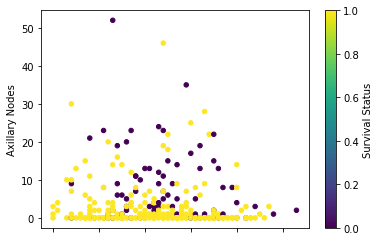

In [40]:
#Create a graph of the data between age at operation, nodes, and survival
df.plot.scatter(x='Age at Operation', y='Axillary Nodes', c='Survival Status', colormap='viridis');

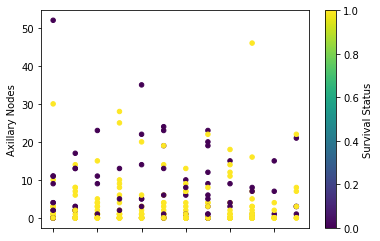

In [101]:
#create a graph of the data between year of operation, nodes, and survival status
df.plot.scatter(x='Year of Operation', y='Axillary Nodes', c='Survival Status', colormap='viridis')

## Part 3 - DataFrame Filtering

Use DataFrame filtering to subset the data into two smaller dataframes. You should make one dataframe for individuals who survived >5 years and a second dataframe for individuals who did not. 

Create a graph with each of the dataframes (can be the same graph type) to show the differences in Age and Number of Positive Axillary Nodes Detected between the two groups.

In [0]:
df.dtypes

In [0]:
#split the dataframe into suvived and died
dfSurvived = df[df['Survival Status'] == 1]
dfDied = df[df['Survival Status'] == 0]

In [82]:
#check the survived dataframe

dfSurvived.head(10)

,Age at Operation,Year of Operation,Axillary Nodes,Survival Status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
5,33,58,10,1
6,33,60,0,1
9,34,58,30,1
10,34,60,1,1
11,34,61,10,1


In [76]:
#check the died dataframe
dfDied.head(10)

,Age at Operation,Year of Operation,Axillary Nodes,Survival Status
7,34,59,0,0
8,34,66,9,0
24,38,69,21,0
34,39,66,0,0
43,41,60,23,0
44,41,64,0,0
45,41,67,0,0
53,42,69,1,0
54,42,59,0,0
62,43,58,52,0


In [0]:
#for the graphs below we are going to set the same x and y ticks so that graph scaling doesn't draw iccorrect conclusions in the data

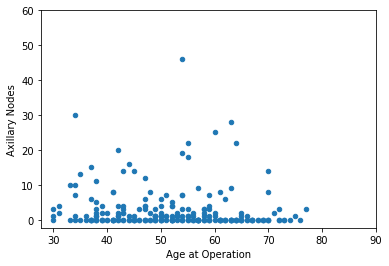

In [99]:
#graph of age and nodes detected in survived
dfSurvived.plot.scatter(x='Age at Operation', y='Axillary Nodes', xticks = [30, 40, 50, 60, 70, 80, 90], yticks = [0, 10, 20, 30, 40, 50, 60]);

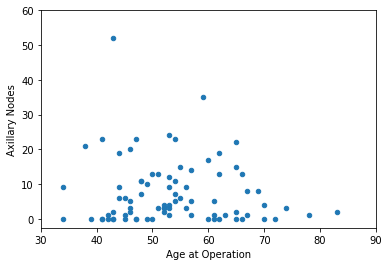

In [98]:
#graph of age and nodes detected in died
dfDied.plot.scatter(x='Age at Operation', y='Axillary Nodes', xticks = [30, 40, 50, 60, 70, 80, 90], yticks = [0, 10, 20, 30, 40, 50, 60]);

## Part 4 - Analysis and Interpretation

Now that you've looked at the data, answer the following questions:

- What is at least one feature that looks to have a positive relationship with survival? (As that feature goes up in value rate of survival increases)
- What is at least one feature that looks to have a negative relationship with survival? (As that feature goes down in value rate of survival increases)
- How are those two features related with each other, and what might that mean?

Answer with text, but feel free to intersperse example code/results or refer to it from earlier.

1. Year of the Operation seems to have a positive relationship with survival rates. (see figure 3)

2. The number of Axillary Nodes seems to have a negative relationship with survival rates. (see figure 1)

3. The relationship between Year of Operation and Survival Rates might be positive due to advancements in medical technology, improvements in the teaching of surgeons, or greater understanding of cancer.
The relationship between Axillary Nodes and Survival Rates might be negative due to higher number axillary nodes causing more complications during surgery, a sign of relativly more serious cancer, or allowing of the cancer to spread easier.

Your Text Answer Here

In [0]:
#Figure 1, relationship between survival status and number of axillary nodes as a percentage in each column
figure1 = pd.crosstab(df['Survival Status'], nodesBin, normalize='columns')

In [150]:
figure1

Axillary Nodes,"(-0.052, 5.2]","(5.2, 10.4]","(10.4, 15.6]","(15.6, 20.8]","(20.8, 26.0]","(26.0, 31.2]","(31.2, 36.4]","(41.6, 46.8]","(46.8, 52.0]"
Survival Status,,,,,,,,,
0,0.194915,0.4,0.611111,0.5,0.666667,0.0,1.0,0.0,1.0
1,0.805085,0.6,0.388889,0.5,0.333333,1.0,0.0,1.0,0.0


In [0]:
#Figure 2, relationships between age and survival
figure2 = pd.crosstab(df['Survival Status'], ageBin, normalize='columns')

In [145]:
figure2

Age at Operation,"(29.947, 35.3]","(35.3, 40.6]","(40.6, 45.9]","(45.9, 51.2]","(51.2, 56.5]","(56.5, 61.8]","(61.8, 67.1]","(67.1, 72.4]","(72.4, 77.7]","(77.7, 83.0]"
Survival Status,,,,,,,,,,
0,0.125,0.074074,0.326087,0.301887,0.327273,0.219512,0.292683,0.222222,0.142857,1.0
1,0.875,0.925926,0.673913,0.698113,0.672727,0.780488,0.707317,0.777778,0.857143,0.0


In [0]:
#figure 3, survival status and year of operation
figure3 = pd.crosstab(df['Survival Status'], df['Year of Operation'], normalize='columns')

In [148]:
figure3

Year of Operation,58,59,60,61,62,63,64,65,66,67,68,69
Survival Status,,,,,,,,,,,,
0,0.333333,0.333333,0.142857,0.115385,0.304348,0.266667,0.258065,0.464286,0.214286,0.16,0.230769,0.363636
1,0.666667,0.666667,0.857143,0.884615,0.695652,0.733333,0.741935,0.535714,0.785714,0.84,0.769231,0.636364
